# Extreme FOI Units

Below are units with extreme FOI (TI) values for AlexNet and ResNet18.

AlexNet: max FOI - TI (66), min FOI - TI (21), min FOI (15)

ResNet18: max FOI - TI (67), min FOI - TI (35)

To see the guided backpropagation images for these units, go to

``/home2/belleliu/artiphisiology/graphs/gbp_{network type}/``

Where AlexNet is ``AN`` and ResNet18 is ``ResNet18``.

# Stimuli for Extreme Responses

Certain stimuli lead to extremely suppressive responses in AlexNet and VGG16. These stimuli are plotted below.

In [20]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import handytools.navigator as nav
import handytools.visualizer as vis
from spectools.stimulus.wyeth import get_stimulus
from spectools.responses import get_response_wrapper, get_drr_wrapper
from spectools.metrics.metrics import responsive
from spectools.models.models import AN_layer, VGG16b_layer, ResNet18_layer

In [22]:
def plot_img(idxs):
    N = len(idxs)
    fig = plt.figure(figsize=(N*3, 3))
    for i in range(N):
        ax = fig.add_subplot(1, N, i+1)
        image_path = os.path.join("/home2/belleliu/artiphisiology/graphs/stimulus_TK/", f"idx={idxs[i]}_pxl=227.png")
        image = mpimg.imread(image_path)
        ax.imshow(image)
        ax.axis('off')

## AlexNet

In [23]:
# params
hkeys = list(AN_layer.keys())[:-3]
mtype = "AN"

In [24]:
TI = {}
for hkey in hkeys:
    Rc = nav.npload(nav.resultpath, f"responses_{mtype}", f"hkey={hkey}_TK_norm=standard.npy") # originally TKRc
    TI[hkey] = []

    for Runit in Rc:
        Rshape = Runit[:225]
        Rtexture = Runit[225:]
        TI[hkey].append(np.std(Rtexture)/np.std(Rshape))

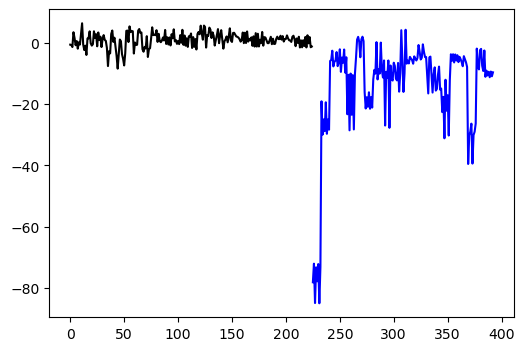

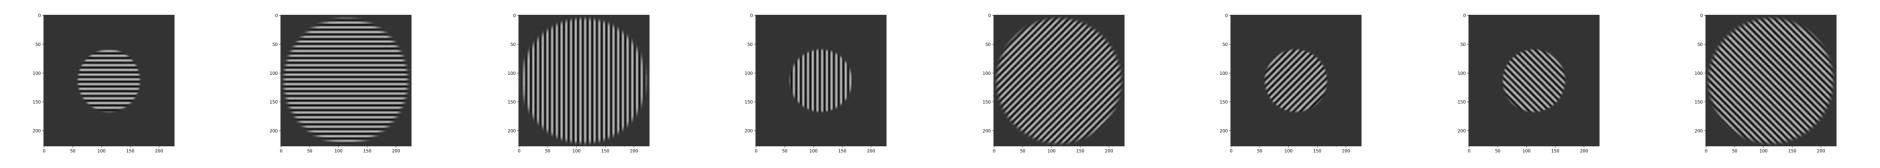

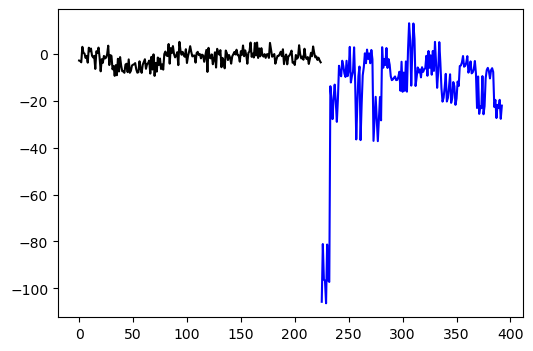

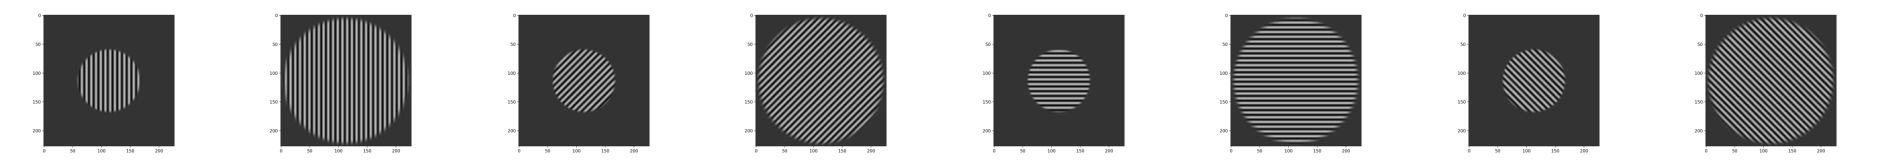

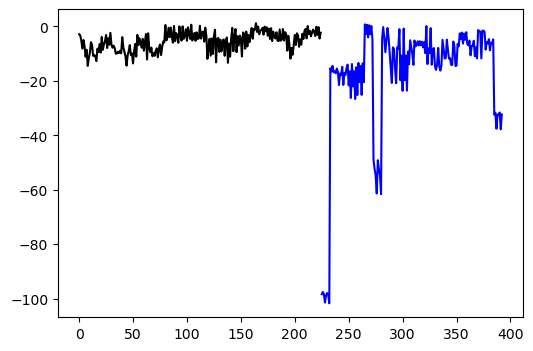

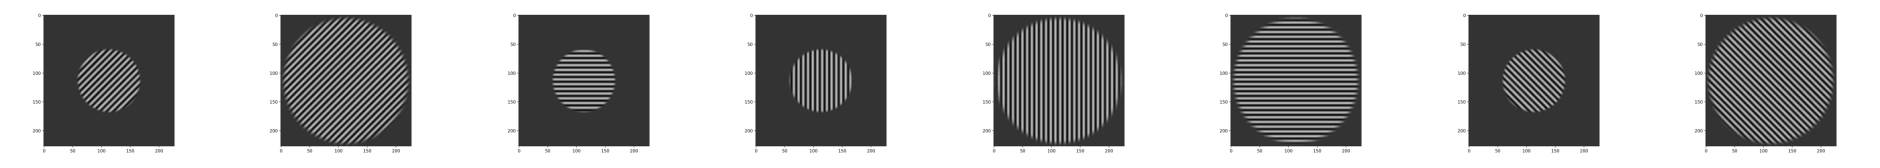

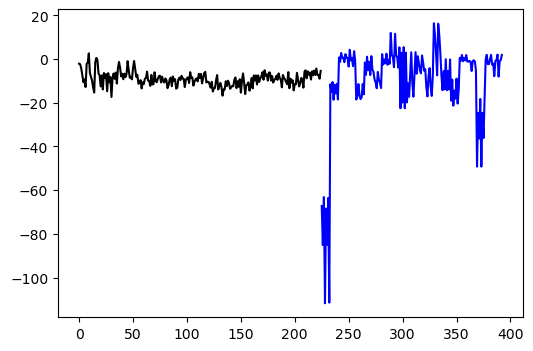

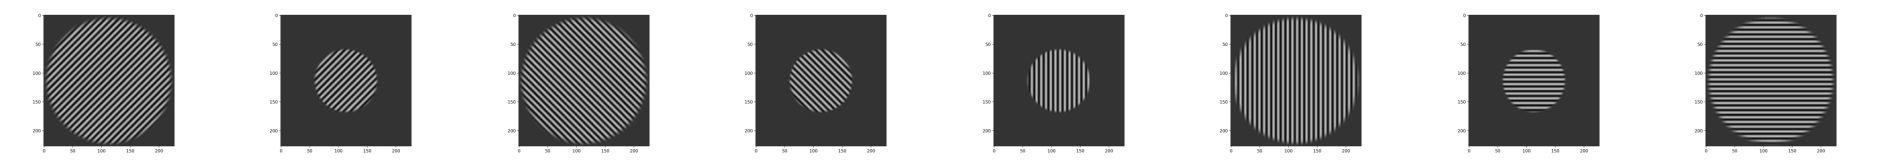

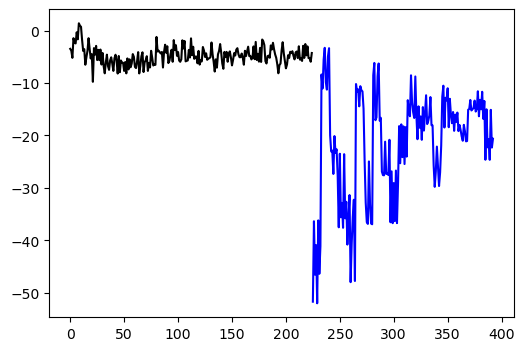

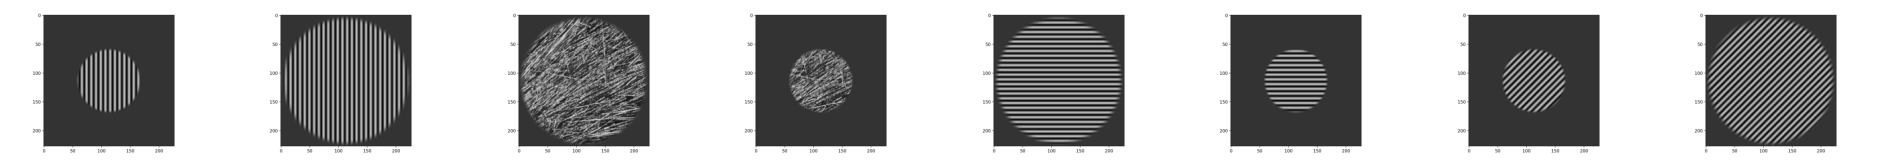

In [25]:
hkey = 6
Rc = nav.npload(nav.resultpath, f"responses_{mtype}", f"hkey={hkey}_TK_norm=standard.npy")
idx_ti = np.argsort(TI[hkey])

for j in range(1, 6):
    Runit = Rc[idx_ti[-j]]
    fig = plt.figure(figsize=(6,4))
    plt.plot(range(225), Runit[:225], "k-")
    plt.plot(range(225, 393), Runit[225:], "b-")
    idx_img = np.argsort(Runit)[:8]
    plot_img(idx_img)

## VGG16

In [26]:
# params
hkeys = list(VGG16b_layer.keys())[:-3]
mtype = "VGG16b"

In [27]:
TI = {}
func = np.std
for hkey in hkeys:
    Rc = nav.npload(nav.resultpath, f"responses_{mtype}", f"hkey={hkey}_TK_norm=standard.npy")
    TI[hkey] = []

    for Runit in Rc:
        Rshape = Runit[:225]
        Rtexture = Runit[225:]
        TI[hkey].append(func(Rtexture)/func(Rshape))

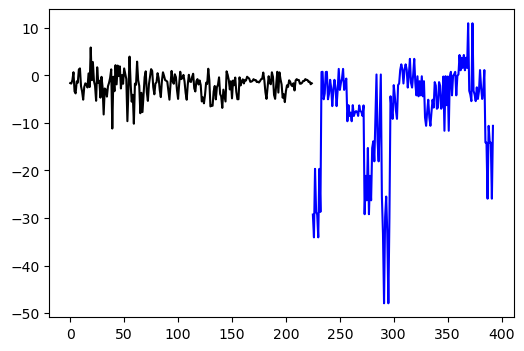

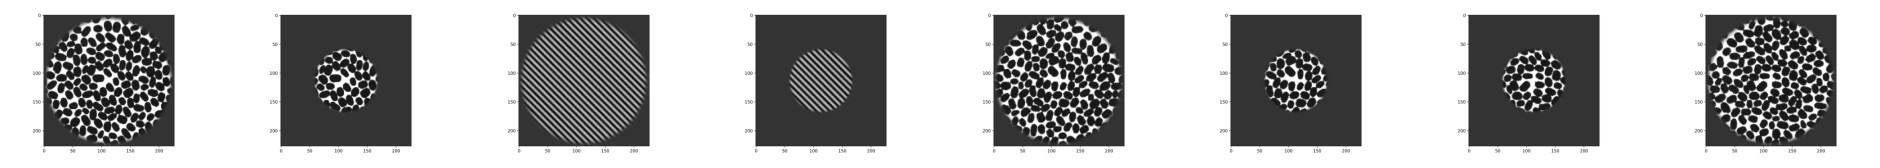

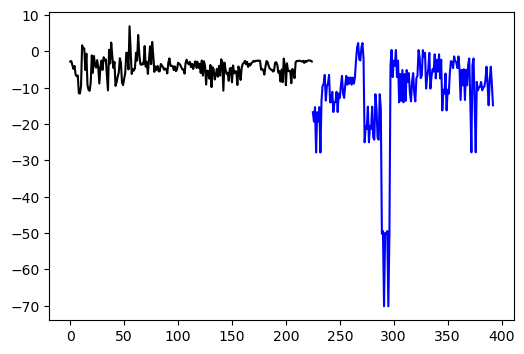

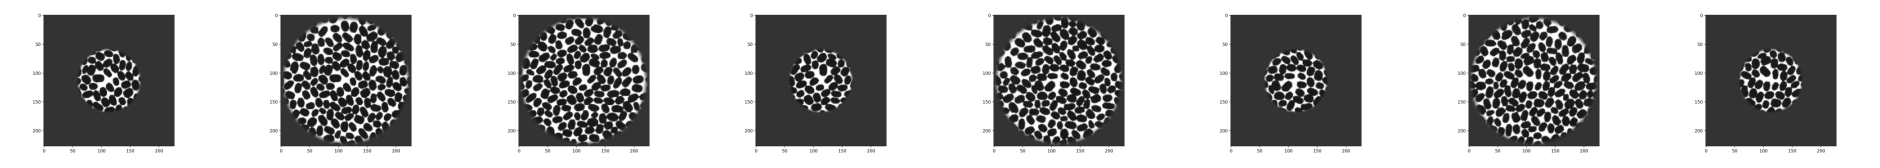

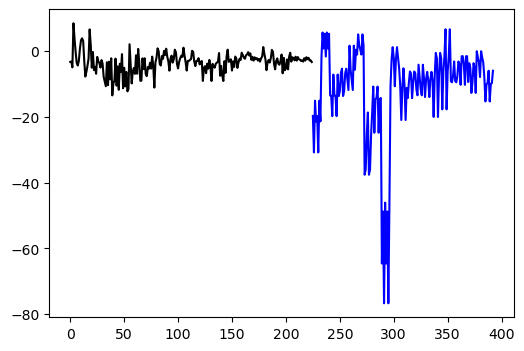

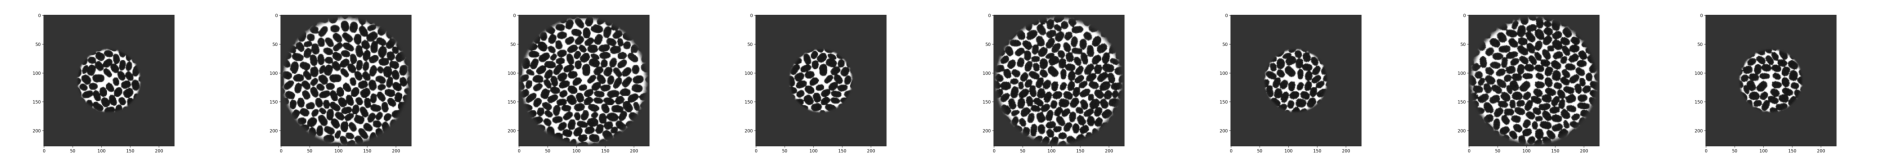

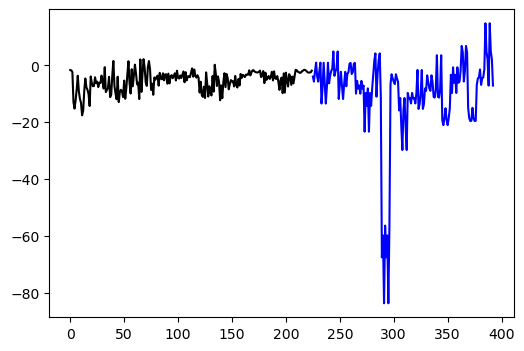

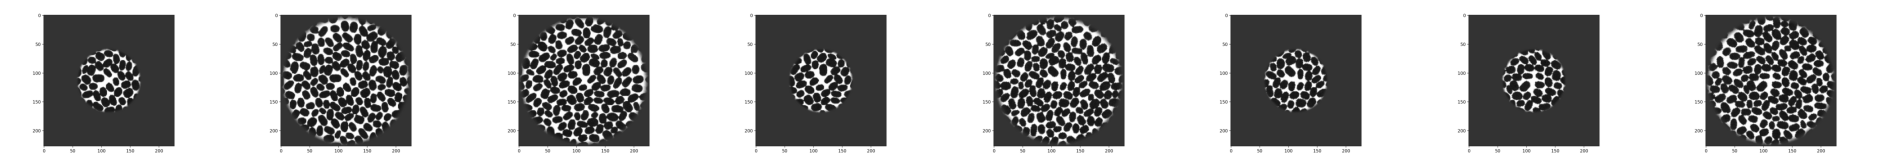

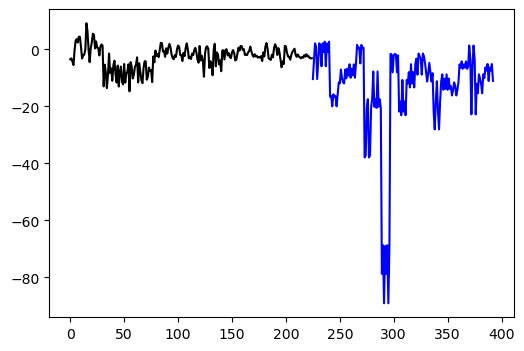

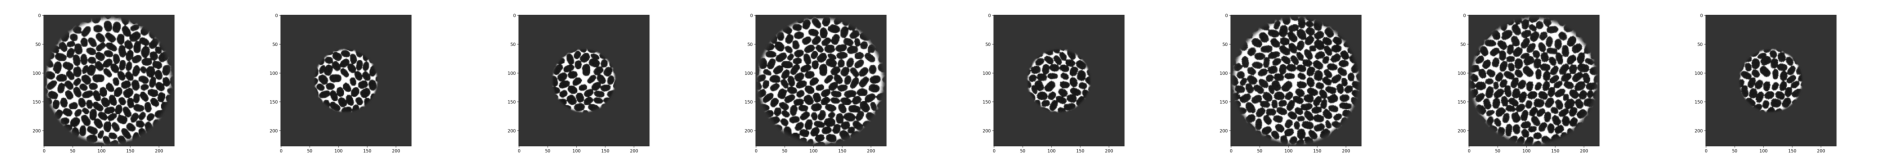

In [28]:
hkey = 19
Rc = nav.npload(nav.resultpath, f"responses_{mtype}", f"hkey={hkey}_TK_norm=standard.npy")
idx_ti = np.argsort(TI[hkey])

for j in range(1, 6):
    Runit = Rc[idx_ti[-j]]
    fig = plt.figure(figsize=(6,4))
    plt.plot(range(225), Runit[:225], "k-")
    plt.plot(range(225, 393), Runit[225:], "b-")
    idx_img = np.argsort(Runit)[:8]
    plot_img(idx_img)